In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
path_to_folder = 'gdrive/MyDrive/MathWorks/'
employment_path = path_to_folder + 'employment_data/'
demographics_path = path_to_folder + 'demographics_data/'

In [5]:
weighted_remote_data = {
    'Mining, logging, construction': 0.19,
    'Manufacturing': 0.01,
    'Trade, transportation, and utilities': 0.03,
    'Information': 0.72,
    'Financial activities': 0.76,
    'Professional and business services': 0.8,
    'Education and health services': 0.83,
    'Leisure and hospitality': 0.71,
    'Other services': 0.33,
    'Government': 0.35
}

In [6]:
# for location in ['washington', 'wales', 'pennsylvania', 'nebraska', 'england']:
#   employment = pd.read_csv(employment_path + location + '_normalized.csv')
#   demographics = pd.read_csv(demographics_path + location + '.csv')
#   max = sorted(zip(employment['Job Activity'], employment['2021']), reverse=True)[:3]
#   max = [i[0] for i in max]

#   l = list(demographics[demographics.columns[1]][5:10])
#   l = [float(i[:-1])/100 for i in l]
#   sum = 0
#   for n in range(len(l)):
#     sum += (n+1)*l[n]

#   print('{}: {}, {}({}), {}({}), {}({})'.format(location, sum, max[0], weighted_remote_data[max[0]], max[1], weighted_remote_data[max[1]], max[2], weighted_remote_data[max[2]]))


In [7]:
employment_data = [pd.read_csv(employment_path + 'washington_normalized.csv'), 
                   pd.read_csv(employment_path + 'pennsylvania_normalized.csv'),
                   pd.read_csv(employment_path + 'nebraska_normalized.csv'),
                   pd.read_csv(employment_path + 'england_normalized.csv'),
                   pd.read_csv(employment_path + 'wales_normalized.csv')]

In [8]:
educational_level = [0 for i in range(5)]
cities = ["washington", "pennsylvania", "nebraska", "england", "wales"]
for location in range(len(cities)):
  demographics = pd.read_csv(demographics_path + cities[location] + '.csv')
  l = list(demographics[demographics.columns[1]][5:10])
  l = [float(i[:-1])/100 for i in l]
  sum = 0
  for n in range(len(l)):
    sum += (n+1)*l[n]
  educational_level[location] = sum
educational_level

[3.2800000000000002, 2.769, 3.1260000000000003, 2.63, 2.4274999999999998]

In [9]:
employment_level = [0 for i in range(5)]
cities = ["washington", "pennsylvania", "nebraska", "england", "wales"]
for location in range(len(cities)):
  demographics = pd.read_csv(demographics_path + cities[location] + '.csv')
  l = float(demographics[demographics.columns[1]][1])
  employment_level[location] = l
employment_level

[37.1, 42.4, 36.1, 38.0, 38.0]

In [10]:
commute_level = [0 for i in range(5)]
cities = ["washington", "pennsylvania", "nebraska", "england", "wales"]
for location in range(len(cities)):
  demographics = pd.read_csv(demographics_path + cities[location] + '.csv')
  l = float(demographics[demographics.columns[1]][11])
  commute_level[location] = l
commute_level

[31.6, 23.7, 21.1, 29.0, 25.4]

In [11]:
education_list = []
employment_list = []
commute_list = []
percent_remote = []
for i in range(9):
  max_name = ""
  max_num = 0
  for j in range(5):
    num = float(list(employment_data[j]['2021'])[i])
    if num > max_num:
      max_num = num
      max_name = cities[j]

  education = educational_level[cities.index(max_name)]
  print('{} ({}): {} ({}) - Educational Level: {}'.format(employment_data[0]['Job Activity'][i], weighted_remote_data[employment_data[0]['Job Activity'][i]], max_name, max_num, education))
  education_list.append(education)
  employment_list.append(employment_level[cities.index(max_name)])
  commute_list.append(commute_level[cities.index(max_name)])
  percent_remote.append(weighted_remote_data[employment_data[0]['Job Activity'][i]])

Mining, logging, construction (0.19): england (0.1989714005823287) - Educational Level: 2.63
Manufacturing (0.01): england (0.1403031375003401) - Educational Level: 2.63
Trade, transportation, and utilities (0.03): pennsylvania (0.2579733548647557) - Educational Level: 2.769
Information (0.72): england (0.0994857002911643) - Educational Level: 2.63
Financial activities (0.76): nebraska (0.0891449363250454) - Educational Level: 3.1260000000000003
Professional and business services (0.8): washington (0.1621858562244301) - Educational Level: 3.2800000000000002
Education and health services (0.83): pennsylvania (0.2038756560355268) - Educational Level: 2.769
Leisure and hospitality (0.71): wales (0.1721014492753623) - Educational Level: 2.4274999999999998
Other services (0.33): england (0.0994857002911643) - Educational Level: 2.63


0.14093042820842616

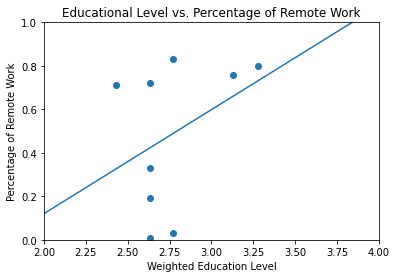

In [12]:
from sklearn.metrics import r2_score
partialModel = np.poly1d(np.polyfit(education_list, percent_remote, 1))
partialModelLine = np.linspace(2, 4, 100);
plt.scatter(education_list, percent_remote)
plt.plot(partialModelLine, partialModel(partialModelLine))
plt.xlim((2, 4))
plt.ylim((0, 1))
plt.title("Educational Level vs. Percentage of Remote Work")
plt.ylabel("Percentage of Remote Work")
plt.xlabel("Weighted Education Level")
r2_score(percent_remote, partialModel(education_list))

0.04576885116067109

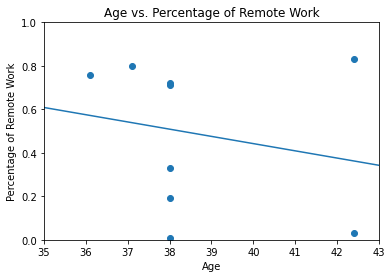

In [15]:
from sklearn.metrics import r2_score
partialModel = np.poly1d(np.polyfit(employment_list, percent_remote, 1))
partialModelLine = np.linspace(35, 43, 100);
plt.scatter(employment_list, percent_remote)
plt.plot(partialModelLine, partialModel(partialModelLine))
plt.xlim((35, 43))
plt.ylim((0, 1))
plt.title("Age vs. Percentage of Remote Work")
plt.ylabel("Percentage of Remote Work")
plt.xlabel("Age")
r2_score(percent_remote, partialModel(employment_list))

0.026442557565184988

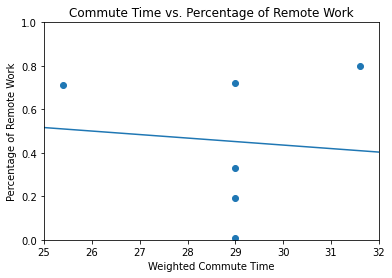

In [14]:
from sklearn.metrics import r2_score
partialModel = np.poly1d(np.polyfit(commute_list, percent_remote, 1))
partialModelLine = np.linspace(25, 32, 100);
plt.scatter(commute_list, percent_remote)
plt.plot(partialModelLine, partialModel(partialModelLine))
plt.xlim((25, 32))
plt.ylim((0, 1))
plt.title("Commute Time vs. Percentage of Remote Work")
plt.ylabel("Percentage of Remote Work")
plt.xlabel("Weighted Commute Time")
r2_score(percent_remote, partialModel(commute_list))